In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/src")
import helpers as hlp

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# Set plot sizes
SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26
BIGGEST_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

# Load & Merge CSV Data

In [4]:
aws_data_dir = '../data/web_scraped/aws_final/'

# Use helper function to load and merge CSVs from folders in above dir
df_all_hotels = hlp.merge_csv_mult_dir(aws_data_dir)

Folders: ['New_York_City-New_York.pg6', 'Honolulu-Hawaii.pg1', 'Tokyo-Kanto.pg5', 'New_York_City-New_York-pg1', 'Honolulu-Hawaii.pg3', 'Tokyo-Kanto-pg1', 'Honolulu-Hawaii.pg2', 'Honolulu-Hawaii.pg4']


In [5]:
df_all_hotels.shape

(314673, 10)

In [6]:
df_all_hotels.head()

,review_id,url,hotel_name,review_date,review_body,user_location,helpful_vote,rating,csv,folder
0,751035792,https://www.tripadvisor.com/Hotel_Review-g6076...,Moxy NYC Downtown,"March 15, 2020",From the moment we walked in the door we were ...,NaN,0,5.0,Moxy_NYC_Downtown-New_York_City_New_York__en.csv,New_York_City-New_York.pg6
1,750880298,https://www.tripadvisor.com/Hotel_Review-g6076...,Moxy NYC Downtown,"March 14, 2020",I loved drinking at the bar with Brian C. The ...,NaN,0,5.0,Moxy_NYC_Downtown-New_York_City_New_York__en.csv,New_York_City-New_York.pg6
2,750330115,https://www.tripadvisor.com/Hotel_Review-g6076...,Moxy NYC Downtown,"March 10, 2020",I’m originally from Manhattan and had to go ba...,NYC,0,5.0,Moxy_NYC_Downtown-New_York_City_New_York__en.csv,New_York_City-New_York.pg6
3,750321994,https://www.tripadvisor.com/Hotel_Review-g6076...,Moxy NYC Downtown,"March 10, 2020","Excellent hotel, fab location close to Ground ...",NaN,4,5.0,Moxy_NYC_Downtown-New_York_City_New_York__en.csv,New_York_City-New_York.pg6
4,749915420,https://www.tripadvisor.com/Hotel_Review-g6076...,Moxy NYC Downtown,"March 8, 2020",My frequent stays at the Moxy only improve as ...,NaN,0,5.0,Moxy_NYC_Downtown-New_York_City_New_York__en.csv,New_York_City-New_York.pg6


In [7]:
df_all_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314673 entries, 0 to 314672
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   review_id      314673 non-null  int64  
 1   url            314673 non-null  object 
 2   hotel_name     314673 non-null  object 
 3   review_date    314673 non-null  object 
 4   review_body    314673 non-null  object 
 5   user_location  272829 non-null  object 
 6   helpful_vote   314673 non-null  int64  
 7   rating         314673 non-null  float64
 8   csv            314673 non-null  object 
 9   folder         314673 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 24.0+ MB


In [8]:
# Check for duplicate rows
dup_rows = df_all_hotels[df_all_hotels.duplicated()].count()
print('Number of duplicate rows:\n\n{}'.format(dup_rows))

Number of duplicate rows:

review_id        0
url              0
hotel_name       0
review_date      0
review_body      0
user_location    0
helpful_vote     0
rating           0
csv              0
folder           0
dtype: int64


In [9]:
# Get count, pct, and type of missing data (per column)
hlp.get_nulls(df_all_hotels)

,Total,Percent,Type
user_location,41844,0.132976,object
folder,0,0.000000,object
csv,0,0.000000,object
rating,0,0.000000,float64
helpful_vote,0,0.000000,int64
review_body,0,0.000000,object
review_date,0,0.000000,object
hotel_name,0,0.000000,object
url,0,0.000000,object
review_id,0,0.000000,int64


# Clean & Prep Data

In [10]:
df_all_hotels_cleaned = df_all_hotels.copy()

# Use helper function to do clean & prep
df_all_hotels_cleaned = hlp.clean_and_prep(df_all_hotels_cleaned)

df_all_hotels_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314673 entries, 0 to 314672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   review_id      314673 non-null  int64  
 1   url            314673 non-null  object 
 2   hotel_name     314673 non-null  object 
 3   review_date    314673 non-null  object 
 4   review_body    314673 non-null  object 
 5   user_location  314673 non-null  object 
 6   helpful_vote   314673 non-null  int64  
 7   rating         314673 non-null  float64
 8   csv            314673 non-null  object 
 9   folder         314673 non-null  object 
 10  City           314673 non-null  object 
 11  polarity       314673 non-null  float64
 12  sentiment_int  314673 non-null  int64  
 13  sentiment      314673 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 36.0+ MB


# Train-Test Split

In [11]:
# Specify df, target, indices, X & y
df = df_all_hotels_cleaned.copy()
target = 'sentiment'
indices = df.index

X = df['review_body']
y = df[target].to_numpy()

In [12]:
_, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, indices, test_size=0.2, shuffle=True, stratify=y)
indices_train.shape, indices_test.shape

((251738,), (62935,))

## Handling class imbalance by under-sampling train data

In [13]:
# Get train df with train indices
train_df = df.iloc[indices_train,:]
train_df.shape

(251738, 14)

In [14]:
# Get classes and counts
unique, counts = np.unique(y_train, return_counts=True)
unique, counts

(array(['negative', 'neutral', 'positive'], dtype=object),
 array([ 25346,  31887, 194505]))

In [15]:
# Determine majority, middle, and minority classes
majority_class = unique[np.argmax(counts)]
minority_class = unique[np.argmin(counts)]
mid_class = np.unique(y_train[(y_train!=majority_class) & (y_train!=minority_class)])[0]
print('Majority: {}, Middle: {}, Minority: {}'.format(majority_class, mid_class, minority_class))

Majority: positive, Middle: neutral, Minority: negative


In [16]:
# Get minority class indices
minority_class_indices = train_df[train_df[target]==minority_class].index
minority_class_len = minority_class_indices.shape[0]
minority_class_len

25346

In [17]:
# Get majority class indices
majority_class_indices = train_df[train_df[target]==majority_class].index
majority_class_indices

Int64Index([ 54646, 250610, 310329, 199634, 129139, 179681, 129951, 125824,
            129409,  21906,
            ...
            197840, 278988,   3125, 204398, 121506,  56104,  91806, 121839,
            225057, 183578],
           dtype='int64', length=194505)

In [18]:
# Get middle class indices
middle_class_indices = train_df[train_df[target]==mid_class].index
middle_class_indices

Int64Index([116051, 224595, 248314,  47845,  90643, 194010, 233558, 182738,
            291309, 282880,
            ...
            186940,  45473,  93182, 101608,  53116, 187781, 230587,   9235,
            189943, 308015],
           dtype='int64', length=31887)

In [19]:
# Randomly under-sample majority and middle class indices to get new under-sampled train df
rand_maj_indices = np.random.choice(majority_class_indices, minority_class_len, replace=False)
rand_mid_indices = np.random.choice(middle_class_indices, minority_class_len, replace=False)
undersample_indices = np.concatenate([minority_class_indices, rand_mid_indices, rand_maj_indices])

train_df_us = df.iloc[undersample_indices,:]
train_df_us.shape

(76038, 14)

Total Number of Ratings:  76038


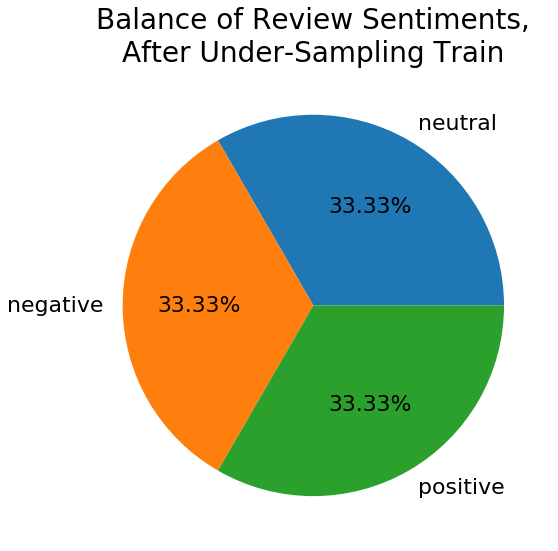

In [20]:
# Plot pie - Classes after undersampling
print('Total Number of Ratings: ', train_df_us.shape[0])

fig, ax = plt.subplots(figsize=(12,8))
hlp.plot_pie(train_df_us[target], fig, ax)
ax.set_title('Balance of Review Sentiments,\nAfter Under-Sampling Train', size=BIGGEST_SIZE)
ax.set_ylabel('')
fig.tight_layout()
fig.savefig('../images/pie_sentiments_train_undersample')

In [21]:
X_train_us = train_df_us['review_body']
y_train_us = train_df_us[target].to_numpy()

# NLP & Predictive Modeling

In [22]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
# nltk.download('stopwords')
import nltk
# nltk.download('wordnet')

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

In [23]:
nb_def = MultinomialNB()
lr_newton = LogisticRegression(multi_class='multinomial', solver="newton-cg")
rf_def = RandomForestClassifier()

## Increased max_features (max_features=None)

### Tf-idf, snowball stemmer, None max_features (filter English stopwords)

In [24]:
tfidf=True
stemmer='snowball'
max_features=None

vect_tfidf_snow_none, vocab_tfidf_snow_none = hlp.build_text_vectorizer(X_train_us,
                             use_tfidf=tfidf,
                             use_stemmer=stemmer,
                             max_features=max_features)

Vectorizer: TfidfVectorizer
Using SnowballStemmer
Max features: None


/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
Xtr_tfidf_snow_none = vect_tfidf_snow_none(X_train_us)

In [ ]:
vocab_tfidf_snow_none

In [ ]:
hlp.fit_pred_score_Nfold(nb_def, Xtr_tfidf_snow_none, y_train_us, N=10)

In [ ]:
hlp.fit_pred_score_Nfold(lr_newton, Xtr_tfidf_snow_none, y_train_us, N=10)

In [ ]:
hlp.fit_pred_score_Nfold(rf_def, Xtr_tfidf_snow_none, y_train_us, N=2)

### Tf-idf, wordnet lemmatizer, None max_features (filter English stopwords)

In [ ]:
tfidf=True
stemmer='lem'
max_features=None

vect_tfidf_lem_none, vocab_tfidf_lem_none = hlp.build_text_vectorizer(X_train_us,
                             use_tfidf=tfidf,
                             use_stemmer=stemmer,
                             max_features=max_features)

In [ ]:
Xtr_tfidf_lem_none = vect_tfidf_lem_none(X_train_us)

In [ ]:
vocab_tfidf_lem_none

In [ ]:
hlp.fit_pred_score_Nfold(nb_def, Xtr_tfidf_lem_none, y_train_us, N=10)

In [ ]:
hlp.fit_pred_score_Nfold(lr_newton, Xtr_tfidf_lem_none, y_train_us, N=10)

In [ ]:
hlp.fit_pred_score_Nfold(rf_def, Xtr_tfidf_lem_none, y_train_us, N=2)

# Appendix

In [ ]:
# don't go beyond here with Run All
assert False